In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pdb

In [3]:
# read pd
df = pd.read_csv('MN_result.csv')
# convert to np
data = df.as_matrix()
df.dtypes

Unnamed: 0                         int64
AssessTot                        float64
LotArea                          float64
BldgArea                         float64
LotFront                         float64
BldgFront                        float64
ResidFAR                         float64
CommFAR                          float64
FacilFAR                         float64
YearBuilt                        float64
IfAlter                            int64
Central Harlem                     int64
Chelsea and Clinton                int64
East Harlem                        int64
Gramercy Park and Murray Hill      int64
Greenwich Village and Soho         int64
Lower Manhattan                    int64
Lower East Side                    int64
Upper East Side                    int64
Upper West Side                    int64
Inwood and Washington Heights      int64
LandUse_01                         int64
LandUse_02                         int64
LandUse_03                         int64
LandUse_04      

In [191]:
# df = df[['AssessTot','LotArea','BldgArea','LotFront','BldgFront','ResidFAR','CommFAR','FacilFAR','YearBuilt']]
# df = df[['AssessTot','LotArea','BldgArea','LotFront','BldgFront','ResidFAR','CommFAR','FacilFAR','YearBuilt']]

In [206]:
# scaling
data_scaled = np.hstack((preprocessing.scale(data[:,1:10]),data[:,10:]))
df_scaled = pd.DataFrame(data_scaled,columns=[u'AssessTot', u'LotArea', u'BldgArea', u'LotFront',
       u'BldgFront', u'ResidFAR', u'CommFAR', u'FacilFAR', u'YearBuilt',
       u'IfAlter', u'Central Harlem', u'Chelsea and Clinton',
       u'East Harlem', u'Gramercy Park and Murray Hill',
       u'Greenwich Village and Soho', u'Lower Manhattan', u'Lower East Side',
       u'Upper East Side', u'Upper West Side',
       u'Inwood and Washington Heights', u'LandUse_01', u'LandUse_02',
       u'LandUse_03', u'LandUse_04', u'LandUse_05', u'LandUse_06',
       u'LandUse_07', u'LandUse_08', u'LandUse_09', u'LandUse_10',
       u'OwnerType_C', u'OwnerType_M', u'OwnerType_O', u'OwnerType_P',
       u'OwnerType_X'])

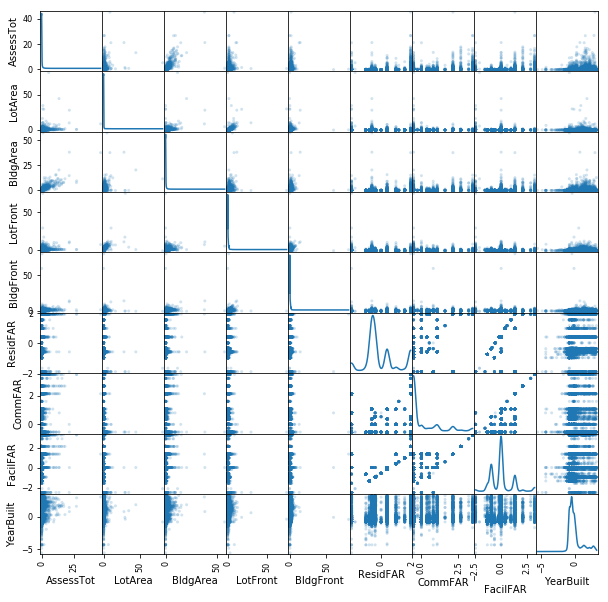

In [193]:
# pairwise scatter plot
scatter_matrix(df_scaled.iloc[:,0:9], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

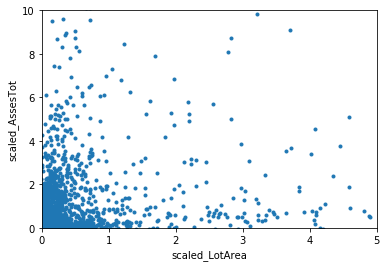

In [194]:
# seems: larger lot area, lower total price
plt.plot(data_scaled[:,1],data_scaled[:,0],'.')
plt.axis([0,5,0,10])
plt.xlabel('scaled_LotArea')
plt.ylabel('scaled_AssesTot')
plt.show()

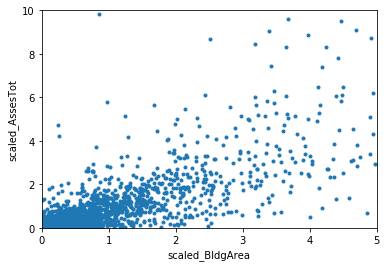

In [195]:
# seems: larger building area, higher total price
plt.plot(data_scaled[:,2],data_scaled[:,0],'.')
plt.axis([0,5,0,10])
plt.xlabel('scaled_BldgArea')
plt.ylabel('scaled_AssesTot')
plt.show()

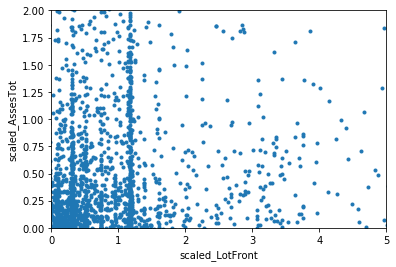

In [196]:
# seems: larger building area, higher total price
plt.plot(data_scaled[:,3],data_scaled[:,0],'.')
plt.axis([0,5,0,2])
plt.xlabel('scaled_LotFront')
plt.ylabel('scaled_AssesTot')
plt.show()

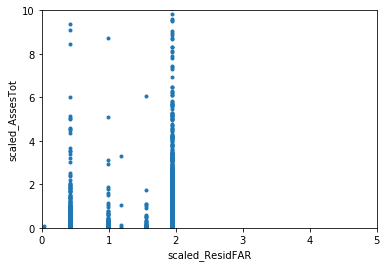

In [197]:
# seems: larger maximum allowable residential floor area ratio, higher price
plt.plot(data_scaled[:,5],data_scaled[:,0],'.')
plt.axis([0,5,0,10])
plt.xlabel('scaled_ResidFAR')
plt.ylabel('scaled_AssesTot')
plt.show()

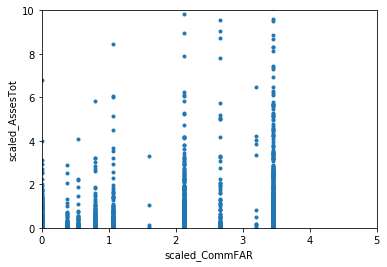

In [198]:
# seems: larger maximum allowable commercial floor area ratio, higher price
plt.plot(data_scaled[:,6],data_scaled[:,0],'.')
plt.axis([0,5,0,10])
plt.xlabel('scaled_CommFAR')
plt.ylabel('scaled_AssesTot')
plt.show()

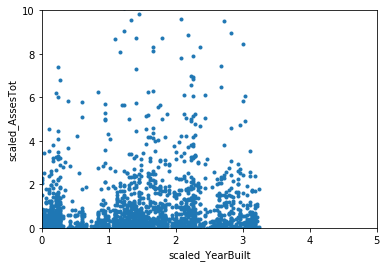

In [199]:
# scaled YearBuilt, AssesTot
plt.plot(data_scaled[:,8],data_scaled[:,0],'.')
plt.axis([0,5,0,10])
plt.xlabel('scaled_YearBuilt')
plt.ylabel('scaled_AssesTot')
plt.show()

In [207]:
# delete some attributes
df_scaled.drop([ u'LotFront',u'BldgFront',u'FacilFAR'],axis = 1,inplace = True)
# df_scaled = df_scaled[[u'AssessTot', u'LotArea', u'BldgArea', u'ResidFAR', u'CommFAR', u'YearBuilt']]
df_scaled.dtypes

AssessTot                        float64
LotArea                          float64
BldgArea                         float64
ResidFAR                         float64
CommFAR                          float64
YearBuilt                        float64
IfAlter                          float64
Central Harlem                   float64
Chelsea and Clinton              float64
East Harlem                      float64
Gramercy Park and Murray Hill    float64
Greenwich Village and Soho       float64
Lower Manhattan                  float64
Lower East Side                  float64
Upper East Side                  float64
Upper West Side                  float64
Inwood and Washington Heights    float64
LandUse_01                       float64
LandUse_02                       float64
LandUse_03                       float64
LandUse_04                       float64
LandUse_05                       float64
LandUse_06                       float64
LandUse_07                       float64
LandUse_08      

In [208]:
data_scaled = df_scaled.as_matrix()

In [209]:
# partitioning
# data_scaled = np.hstack((data_scaled,np.ones((len(data_scaled),1))))
X_train = data_scaled[:10000,1:17]
Y_train = data_scaled[:10000,0]
X_test = data_scaled[10000:,1:17]
Y_test = data_scaled[10000:,0]

In [210]:
# create linear regression object
regr = linear_model.LinearRegression()

# train the model
regr.fit(X_train,Y_train)

# test the model
Y_pred_train = regr.predict(X_train)
Y_pred_test = regr.predict(X_test)

In [229]:
# the coefficients
np.set_printoptions(precision=4, suppress=True)
print('attributes:\n',df_scaled.columns[1:17])
print('coefficients:', regr.coef_)
# mean squared error
print('mean_squared_error train: %.2f' % mean_squared_error(Y_train,Y_pred_train))
print('mean_squared_error test: %.2f' % mean_squared_error(Y_test,Y_pred_test))
# r2 score
print('r2_score: %.2f' % r2_score(Y_test,Y_pred_test))

('attributes:\n', Index([u'LotArea', u'BldgArea', u'ResidFAR', u'CommFAR', u'YearBuilt',
       u'IfAlter', u'Central Harlem', u'Chelsea and Clinton', u'East Harlem',
       u'Gramercy Park and Murray Hill', u'Greenwich Village and Soho',
       u'Lower Manhattan', u'Lower East Side', u'Upper East Side',
       u'Upper West Side', u'Inwood and Washington Heights'],
      dtype='object'))
('coefficients:', array([-0.142 ,  1.0442, -0.0158,  0.0929,  0.028 ,  0.0124,  0.051 ,
        0.0366, -0.0016,  0.1112, -0.0324, -0.3352,  0.0005,  0.0868,
        0.0831,  0.    ]))
mean_squared_error train: 0.35
mean_squared_error test: 0.66
r2_score: -6.52


In [216]:
np.var(Y_train)

1.5244762957098545

In [218]:
np.var(Y_test)

0.087379385449443889

In [4]:
import seaborn as sns
# read pd
df = pd.read_csv('MN with additional features.csv')
df.dtypes

Unnamed: 0                         int64
ZipCode                            int64
Zone                              object
Address                           object
LandUse                            int64
LandUseStr                        object
OwnerType                         object
LotArea                            int64
BldgArea                           int64
NumBldgs                           int64
UnitsRes                           int64
UnitsTotal                         int64
LotFront                         float64
BldgFront                        float64
AssessLand                         int64
AssessTot                          int64
YearBuilt                          int64
YearAlter                          int64
IfAlter                            int64
ResidFAR                         float64
CommFAR                          float64
FacilFAR                         float64
Central Harlem                     int64
Chelsea & Clinton                  int64
East Harlem     

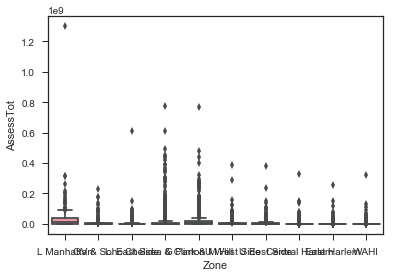

In [13]:
# sns.set(style="ticks")
sns.boxplot(x="Zone", y="AssessTot", data=df)
# sns.despine(offset=10, trim=True)
plt.show()

In [10]:
np.random.seed(sum(map(ord, "distributions")))
x = np.random.normal(size=100)
sns.distplot(x)